In [36]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [238]:
exp='exp class synthetic'
if exp=='exp reg synthetic':
    folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    folder = 'exps77/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-11 12:37:04.184427'
    T=500
    x_right=500
elif exp =='exp class synthetic':
    folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-08 22%3a00%3a35.758740'
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n10val_perc0.0-2019-02-08 11%3a16%3a06.897500'
    T=500
    x_right=500
elif exp =='lenk regression':
    folder = 'exps77/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 14:48:50.964294/'
    T=100
    x_right=100
elif exp =='lenk classification':
    folder = 'exps77/grid_searchexpLenkn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 18:54:20.948679'
    T=100
    x_right=100

title=exp
metric='loss'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'loss': get_file(starts_with=starts_with)}
    print(metrics)
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [239]:
erm_alg='fista'
put_in_dict('ITL-ts'+erm_alg, 'ITL ERM', 'black')
put_in_dict('ITL-tsssubgd', 'ITL SGD', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL SGD-SGD', 'c')
put_in_dict('LTL-tr'+erm_alg+'tsssubgd', 'LTL ERM-SGD', 'b')
put_in_dict('LTL-trssubgdts'+erm_alg, 'LTL SGD-ERM', 'm')
put_in_dict('LTL-tr'+erm_alg+'ts'+erm_alg, 'LTL ERM-ERM', 'red')

if exp != 'lenk':
    put_in_dict('MEAN-ts'+erm_alg, 'MEAN ERM', 'green')
    put_in_dict('MEAN-tsssubgd', 'MEAN SGD', 'orange')

{'loss': array([0.39367303, 0.38901419, 0.38501982, 0.39483061, 0.38585756,
       0.39149407, 0.38693017, 0.39013302, 0.39613659, 0.39864738])}
----------loss-ITL ERM-loss mean std 0.39117364451118714 0.004359977986175759
{'loss': array([0.78413872, 0.78775239, 0.77271169, 0.79519876, 0.78494526,
       0.78588878, 0.78856645, 0.79089019, 0.77302127, 0.79358544])}
----------loss-ITL SGD-loss mean std 0.7856698953187928 0.007240537909303537
{'loss': array([[0.77931865, 0.79069606, 0.78028419, ..., 0.78761102, 0.76698548,
        0.81478941],
       [0.51934315, 0.46844237, 0.42546271, ..., 0.70584582, 0.71693088,
        0.62472497],
       [0.4675874 , 0.462379  , 0.3702723 , ..., 0.58794998, 0.60483536,
        0.59299015],
       ...,
       [0.1019025 , 0.11170133, 0.10720398, ..., 0.10449643, 0.10210617,
        0.10598217],
       [0.1029885 , 0.11208852, 0.10638228, ..., 0.10419821, 0.10114128,
        0.10511281],
       [0.10099561, 0.11275958, 0.10586271, ..., 0.10832993, 0.1

In [244]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=1.5
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    plt.ylim(0.08, 0.14)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

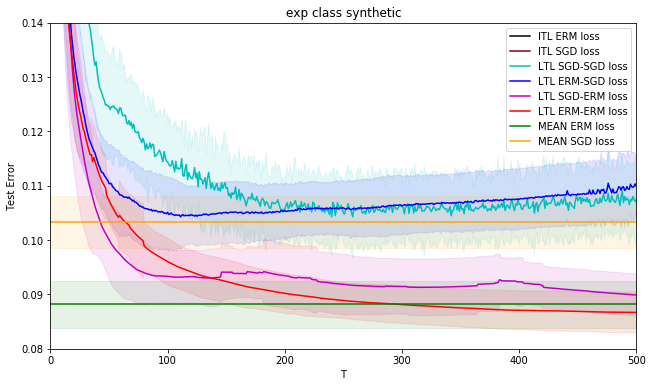

In [245]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+metric+'ERMvsSGD-T'+str(x_right))